# Properties of the Hydrogen Atom

## Motivation:

[Previous notes](the_hydrogen_atom.ipynb) presented the wave function and energy solution for the Schrodinger equation for the hydrogen atom.  In these notes we present properties of these wavefunctions and energies.

## Learning Goals:

After working through these notes, you will be able to:

1. 

## Coding Concepts:

The following coding concepts are used in this notebook:

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## Review of the Hydrogen Atom Solutions

The complete hydrogen atom wavefunctions are a product of the radial and angular components

$\psi_{nlm_l}(r,\theta,\phi) = R_{nl}(r)Y_l^{m}(\theta,\phi)$

where 
\begin{equation}
Y_l^{m} = \sqrt{\frac{(2l+1)(l-|m|)!}{4\pi(l+|m|)!}}P_l^{|m|}(\cos\theta)e^{im\phi}
\end{equation}
and
\begin{equation}
R_{nl} = -\left[ \frac{(n-l-1)!}{2n[(n+l)!]^3}\right]^{1/2} \left( \frac{2}{na_0}\right)^{l+3/2} r^le^{-r/na_0}L_{n+l}^{2l+1}\left( \frac{2r}{na_0}\right).
\end{equation}

The energies are
\begin{equation}
E_n =  - \frac{e^2}{8\pi\epsilon_0a_0n^2}
\end{equation}


## The Radial and Angular Wave Functions are Normalized

The constants with the factorials in the radial and angular wave functions are normalization constants.  They yield normalized wave functions for each indepdendent component.  In turn, the overall wave function is also normalized.

### The Radial Wave Functions are Normalized

The radial wave functions are normalized.  Rather than derive this for you, I will use code and numeric integration to demonstrate that

\begin{equation}
\langle R_{nl}|R_{nl}\rangle = \int_0^\infty R_{nl}^*R_{nl}r^2dr = 1
\end{equation}

for select values of $n$ and $l$.

In [1]:
import numpy as np
from scipy import integrate
from scipy.special import eval_genlaguerre
from scipy.special import factorial
a0 = 1.0 # radial unit of Bohr!    
def hydrogen_atom_radial_wf(r,n,l):
    R_prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
    return R_prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
def integrand(r,n1,l1,n2,l2):
    return r*r*hydrogen_atom_radial_wf(r,n1,l1)*hydrogen_atom_radial_wf(r,n2,l2)

for n in range(1,6):
    for l in range(n):
        print(f"<R_{n}{l}|R_{n}{l}> = ",np.round(integrate.quad(integrand,0,np.infty,args=(n,l,n,l))[0],3))

<R_10|R_10> =  1.0
<R_20|R_20> =  1.0
<R_21|R_21> =  1.0
<R_30|R_30> =  1.0
<R_31|R_31> =  1.0
<R_32|R_32> =  1.0
<R_40|R_40> =  1.0
<R_41|R_41> =  1.0
<R_42|R_42> =  1.0
<R_43|R_43> =  1.0
<R_50|R_50> =  1.0
<R_51|R_51> =  1.0
<R_52|R_52> =  1.0
<R_53|R_53> =  1.0
<R_54|R_54> =  1.0


### The Angular Wave Functions are Normalized

We have already seen this but below I demonstrate that both the $\phi$ and $\theta$ components of the $Y_l^m(\theta, \phi)$ equation are normalized for limited $l$ and $m$ values. A

In [2]:
from scipy import integrate
from scipy.special import lpmv
import numpy as np

def theta_norm2(m,l):
    return ((2*l+1)*math.factorial(l-np.abs(m)))/(2*math.factorial(l+np.abs(m)))
def integrand(theta,m,l):
    return theta_norm2(m,l)*lpmv(m,l,theta)**2

print ("{:<8} {:<15} {:<20}".format('l','m','<Theta_ml | Theta_ml>'))
print("--------------------------------------------------------------------")
for l in range(4):
    for m in range(l+1):
        print ("{:<8} {:<15} {:<20}".format(l,m,np.round(integrate.quad(integrand,-1,1,args=(m,l))[0],3)))

l        m               <Theta_ml | Theta_ml>
--------------------------------------------------------------------


NameError: name 'math' is not defined

In [19]:
from scipy import integrate
from scipy.special import lpmv
import numpy as np

def phi_norm2():
    return 1/(2*np.pi)
def integrand(phi):
    return phi_norm2()

print ("{:<15} {:<20}".format('m','<Phi_m | Phi_m>'))
print("--------------------------------------------------------------------")
for m in range(7):
    print ("{:<15} {:<20}".format(m,np.round(integrate.quad(integrand,0,2*np.pi)[0],3)))

m               <Phi_m | Phi_m>     
--------------------------------------------------------------------
0               1.0                 
1               1.0                 
2               1.0                 
3               1.0                 
4               1.0                 
5               1.0                 
6               1.0                 


## The Radial Wave Functions are only Orthogonal when $\Delta l = 0$ and $\Delta n \neq 0$

## Radial Densities

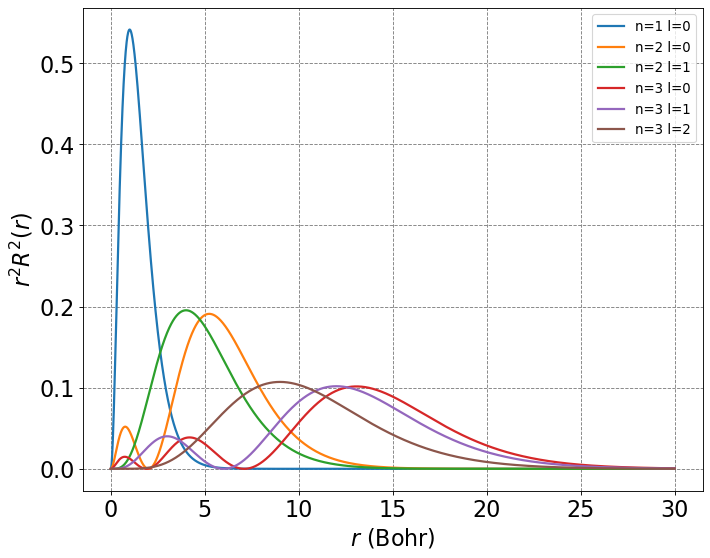

In [7]:
# let's plot some radial wavefunctions of the hydrogen atom
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import factorial
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import plotting as myplt
%matplotlib inline

fig, ax = myplt.define_figure(xlabel="$r$ (Bohr)", ylabel="$r^2R^2(r)$")

# parameters for plotting
nLimit = 3
a0 = 1.0
r = np.arange(0,30,0.01)

for n in range(1,nLimit+1):
    for l in range(n):
        prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
        R = prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
        label = "n=" + str(n) + " l=" + str(l)
        ax.plot(r,np.power(R,2)*np.power(r,2),label=label, lw=2)
plt.legend(fontsize=12)
plt.show();

## Angular Densities

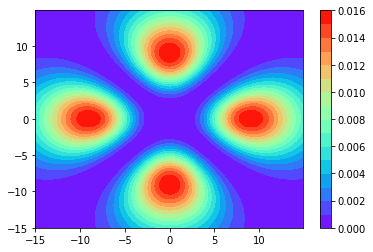

In [10]:
# recall what the spherical harmonics look like
# make two plots of the same spherical harmonic
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import sph_harm
from scipy.special import eval_genlaguerre
from scipy.special import factorial
a0 = 1
def h_atom_r_prob(n,l,r):
    prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
    R = prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
    return np.power(r,2)*np.power(R,2)
def h_atom_theta_phi_prob(l,m,theta,phi):
    y = sph_harm(m, l, phi, theta).real
    return y*y

def plot_h_atom_prob_xy_xz(n,l,m):
    xi = np.arange(-15,15,0.1)
    yi = np.arange(-15,15,0.1)
    zi = np.arange(-15,15,0.1)
    
    r = np.sqrt(np.power(xi,2)+np.power(yi,2))
    theta1 = np.zeros(xi.size,dtype=float)
    theta2 = np.arccos(zi/np.sqrt(np.power(xi,2)+np.power(zi,2)))
    phi1 = np.arctan(yi/xi)
    
    X,Y = np.meshgrid(xi,yi)
    probxy = np.empty(X.shape,dtype=float)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            r = np.sqrt(X[i,j]**2+Y[i,j]**2)
            phi = np.arctan(Y[i,j]/X[i,j])
            #print r, phi, h_atom_r_prob(n,l,r), h_atom_theta_phi_prob(l,m,np.pi/2.0,phi)
            probxy[i,j] = h_atom_r_prob(n,l,r)*h_atom_theta_phi_prob(l,m,np.pi/2.0,phi)
    
    # Create the contour plot
    zmax = np.amax(probxy)
    zmin = np.amin(probxy)
    CS = plt.contourf(X, Y, probxy, 15, cmap=plt.cm.rainbow, vmax=zmax, vmin=zmin)
    plt.colorbar()  
    plt.show()
    
    
    

plot_h_atom_prob_xy_xz(n=3,l=2,m=2)

In [11]:
#selection rules for theta and phi
from scipy import integrate
nLimit = 3
a0 = 1.0
theta = np.arange(0,np.pi,0.05)
phi = np.arange(0,2*np.pi,0.05)

for n1 in range(1,nLimit+1):
    for l1 in range(n1):
        for ml1 in range(-l1,l1):
            y1 = sph_harm(ml1, l1, phi, theta)
            for n2 in range(1,nLimit+1):
                for l2 in range(n2):
                    for ml2 in range(-l2,l2):
                        y2 = sph_harm(ml2, l2, phi, theta)
                        selection = integrate.simps(integrate.simps(y1, y2,phi)*np.cos(theta)*np.sin(theta),theta)
                        print("<",n1,l1,ml1,"|cos|",n2,l2,ml2,"> = ", selection)

ValueError: operands could not be broadcast together with shapes () () (126,) (63,) 

In [8]:
import numpy as np
from scipy import integrate
from scipy.special import eval_genlaguerre
from scipy.special import factorial
a0 = 1.0 # radial unit of Bohr!    
def hydrogen_atom_radial_wf(r,n,l):
    R_prefactor = -np.sqrt(factorial(n-l-1)/(2*n*factorial(n+l)))*(2.0/(n*a0))**(l+1.5)*np.power(r,l)*np.exp(-r/(n*a0))
    return R_prefactor*eval_genlaguerre(n-l-1,2*l+1,2*r/(n*a0))
def integrand(r,n1,l1,n2,l2):
    return r*r*hydrogen_atom_radial_wf(r,n1,l1)*hydrogen_atom_radial_wf(r,n2,l2)
print(integrate.quad(integrand,0,np.infty,args=(1,0,2,1))[0])
print(integrate.quad(integrand,0,np.infty,args=(1,0,2,0))[0])
print(integrate.quad(integrand,0,np.infty,args=(1,0,1,0))[0])
print(integrate.quad(integrand,0,np.infty,args=(2,1,2,1))[0])

0.4838498257349489
-2.1853079462246525e-17
1.0000000000000004
1.0


In [7]:
#selection rules for r
from scipy import integrate
nLimit = 3
a0 = 1.0
r = np.arange(0,30,0.01)

for n1 in range(1,nLimit+1):
    for l1 in range(n1):
        prefactor1 = -np.sqrt(factorial(n1-l1-1)/(2*n1*factorial(n1+l1)))*(2.0/(n1*a0))**(l1+1.5)*np.power(r,l1)*np.exp(-r/(n1*a0))
        R1 = prefactor1*eval_genlaguerre(n1-l1-1,2*l1+1,2*r/(n1*a0))
        for n2 in range(1,nLimit+1):
            for l2 in range(n2):
                prefactor2 = -np.sqrt(factorial(n2-l2-1)/(2*n2*factorial(n2+l2)))*(2.0/(n2*a0))**(l2+1.5)*np.power(r,l2)*np.exp(-r/(n2*a0))
                R2 = prefactor*eval_genlaguerre(n2-l2-1,2*l2+1,2*r/(n2*a0))
                selection = integrate.simps(R1*np.power(r,3)*R2,r)
                print("<",n1,l1,"|r|",n2,l2,"> = ", selection)

< 1 0 |r| 1 0 > =  0.3851174232442131
< 1 0 |r| 2 0 > =  -0.9627935580681646
< 1 0 |r| 2 1 > =  0.3851174232442131
< 1 0 |r| 3 0 > =  -0.2888380676801717
< 1 0 |r| 3 1 > =  0.3851174232724586
< 1 0 |r| 3 2 > =  0.3851174232442131
< 2 0 |r| 1 0 > =  -5.939336848555927
< 2 0 |r| 2 0 > =  40.751915349184785
< 2 0 |r| 2 1 > =  -5.939336848555927
< 2 0 |r| 3 0 > =  -29.214132258024623
< 2 0 |r| 3 1 > =  11.329711969974054
< 2 0 |r| 3 2 > =  -5.939336848555927
< 2 1 |r| 1 0 > =  4.747962431986855
< 2 1 |r| 2 0 > =  -30.38628475348793
< 2 1 |r| 2 1 > =  4.747962431986855
< 2 1 |r| 3 0 > =  19.557018003009727
< 2 1 |r| 3 1 > =  -7.596290017027006
< 2 1 |r| 3 2 > =  4.747962431986855
< 3 0 |r| 1 0 > =  9.467817536463858
< 3 0 |r| 2 0 > =  -122.75448601549655
< 3 0 |r| 2 1 > =  9.467817536463858
< 3 0 |r| 3 0 > =  238.67988900888992
< 3 0 |r| 3 1 > =  -56.588810579760754
< 3 0 |r| 3 2 > =  9.467817536463858
< 3 1 |r| 1 0 > =  -10.04738274458085
< 3 1 |r| 2 0 > =  120.29715465244726
< 3 1 |r| 2 1